# Verification of FEFLOW using an analytical solution for a heat transport problem

## Objective

For verification of FEFLOWs heat transport solver, we compare the numerical solution by FEFLOW for a heat transport problem to the analytical solution suggested by Domenico and Palciauskas (1973). The problem describes the advective transport of heat by groundwater flow under steady- state conditions in a two-dimensional region. 

## Problem Description

Buoyancy effects are neglected for this solution. Following Domenico and Palciauskas (1973), the porous medium is assumed to be isotropic and homogeneous with respect to both fluid and heat. The topography is described by a cosine function, to which the watertable is directly related to. 
The upper boundary of the region is therefore given by the spatially variable watertable (Equation 1), the lower boundary for the flow problem is considered as an impermeable basement (Figure 1a). Both lateral boundaries are impermeable. Boundary conditions for the heat transport problem include a fixed temperature T0 at the upper boundary, two impermeable lateral boundaries and a lower boundary that is described by the specific heat flow qb. 

<img src="domenico_palciauskas_1.png">

***Figure 1***: *Two-dimensional diagrams showing (a) the boundary conditions for the flow problem, (b) the flow field for the water-table configuration A- B cos(πx/L), (c) the boundary conditions for the steady-state temperature distribution, and (d) the temperature field of pure conduction for a constant temperature upper boundary (From Domenico and Palciauskas, 1973).*

## Analytical Solution

The watertable at the upper boundary is described by:

$$h(x)= A- cos⁡(πx⁄(L)) \label{eq:1}	$$	

The analytical solutions for hydraulic head and temperature are (adapted from Rühaak et al., 2008): 

$$h(x,z)= A-( (B cosh(πz⁄(L)))/(cosh⁡((πz_0)⁄(L))   ))  cos⁡(πx⁄(L))$$ [2]	
[3]	

$$T(x,z)= T_0 + \frac{q_b}{(z_0 )- z} + \frac{ρcq_b⁄λKB}{2λ)} \frac{cos⁡(πx⁄L)}{cosh⁡(πz_0/L)} × \{(z_0- z)cosh⁡(πz⁄(L)) + L⁄π \frac{sinh⁡(π(z-z_0))⁄(L)}{cosh⁡((πz_0)⁄L}\}  $$                                                         

Constants A and B are defined as $A=L/2+B$, and $B=cosh(πz_0/L)$. A length of $L=200m$ in horizontal direction, and a vertical extent of $z_0=100m$ were used as domain for all simulations. Parameters are given in Table 1. 

## Numerical Solution in FEFLOW

For FEFLOW simulations, no upwinding was applied, and algebraic multigrid SAMG was used for solving equation systems. Simulations were done for different grid setups. Grid No. 1 to 4 were obtained using the Transport mapping mesh generator (quadrilateral mode) of FEFLOW, whereas Grid No.5 was obtained by the Gridbuilding mesh generator. 

In [2]:
import pandas as pd
pd.read_excel("table_1.xlsx", index_col=0)

,Quantity,Value,Unit
K,hydraulic conductivity,4.89 · 10-8,m s-1
ρ,density,998,kg m-3
T0,temperature at upper boundary,10,°C
qb,specific heat flow at lower boundary,0.03,W m-2
ε,porosity,0.3,-
C,specific heat capacity,"4,218",J kg-1 K-1
λ,thermal conductivity,3,W m-1 K-1
DL,longitudinal dispersivity,5,m
DT,transverse dispersivity,0.5,m


For quantifying variations in between analytical and numerical solutions, the root mean square error (RMSE) was calculated for both head and temperature (Equation 4). Additionally, the relative deviation was calculated (Equation 5). In Figure 2  and 3, the analytical solution for head and temperature, as well as the relative deviations are depicted. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ifm_contrib as ifm
ifm.forceLicense("Viewer")
doc = ifm.loadDocument("./model_numeric/femdata/grid_1_are.fem")
#doc.c.user.df.distributions()
#ifm.colormaps.cmaps

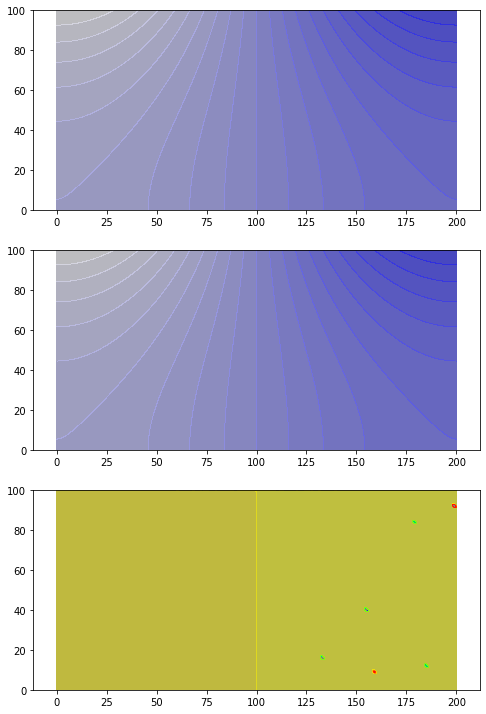

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 12.5))

plt.sca(ax1)
plt.axis("equal")
plt.title = "head (analytic)"
doc.c.plot.faces()
doc.c.plot.fringes(distr="head_analytic", cmap='feflow_white_blue', levels=np.arange(100,111, .5))

plt.sca(ax2)
plt.axis("equal")
plt.title = "head (numeric)"
doc.c.plot.faces()
doc.c.plot.fringes(par=ifm.Enum.P_HEAD, cmap='feflow_white_blue', levels=np.arange(100,111, .5))

plt.sca(ax3)
plt.axis("equal")
plt.title = "Delta"
doc.c.plot.faces()
doc.c.plot.fringes(expr="delta_h", cmap='feflow_blue_green_yellow_red', levels=np.arange(-0.002, +0.002, .0001))



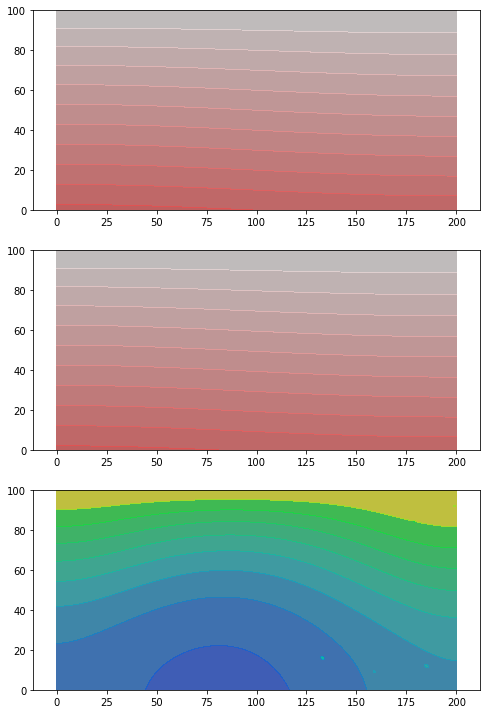

In [81]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 12.5))

plt.sca(ax1)
plt.axis("equal")
plt.title = "head (analytic)"
doc.c.plot.faces()
doc.c.plot.fringes(distr="temperature_analytic", cmap='feflow_white_red', levels=np.arange(10, 11.5, .1))

plt.sca(ax2)
plt.axis("equal")
plt.title = "head (numeric)"
doc.c.plot.faces()
doc.c.plot.fringes(par=ifm.Enum.P_TEMP, cmap='feflow_white_red', levels=np.arange(10, 11.5, .1))

plt.sca(ax3)
plt.axis("equal")
plt.title = "Delta"
doc.c.plot.faces()
doc.c.plot.fringes(expr="delta_T", cmap='feflow_blue_green_yellow_red', levels=np.arange(-0.01, +0.01, .001))



All simulations showed simular distributions within the flow domain, with a minimum of the relative deviation for the head at x= L/2, where a vertical equipotential line is found, and an increase in deviation with depth for temperature. RMSE are depicted for each simulation in Table 2. 
Results show that FEFLOW numerical solutions for this domain are only slightly dependent on mesh size, and RMSE ranges around 0.0056 for all simulations. 


$$RMSE = \sqrt{\frac{1}{n} \cdot \Sigma_{i=1}^n (u_{an} - u_{nu})^2 }$$

$$Relative Deviation= \frac{|(u_{an} - u_{nu})|}{u_{an}}$$

| GRID                                                        | RMSE (head)    | RMSE (temperature)             |
|:------------------------------------------------------------|:---------------|:-------------------------------|
| Grid 1: Rectangular dz=dx=5m 800 elements 861 nodes         | 8.31 · 10-4    | 5.55 · 10-3                    |
| Grid 2: Rectangular dz=dx=1m 20,000 elements 20,301 nodes   | 3.30 · 10-5    | 5.60 · 10-3                    |
| Grid 3: Rectangular dz=dx=0.5m 80,000 elements 80,601 nodes | 8.26 · 10-6    | 5.60 · 10-3                    |
| Grid 4: Triangular, regular <br> (4 equil.triangles around center) 20,000 elements 40,301 nodes | 1.66 ·10-5 | 5.60 · 10-3    |
| Grid 5: Triangular, Irregular <br> 29,564 elements 14,972 nodes |  3.44 · 10-5   | 5.61 · 10-3    |

References: 
+ Domenico, P.A.  and Palciauskas, V.V. (1973). Theoretical Analyis of Forced Convective Heat Transfer in Regional Ground- Water Flow. Geol Soc Am Bull 1973;84:3803-14.
+ Rühaak, W.,  Rath, V., Wolf A. and Clauser, C.(2008). 3D finite volume groundwater and heat transport modeling with non-orthogonal grids, using a coordinate transformation method. Adv in Wat Res, 31 (2008) 513-524.
